In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions - Transactions.csv")

In [4]:
# Inspect datasets
def inspect_data(df, name):
    print(f"\n{name} Dataset Overview")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("Sample Data:")
    print(df.head(), "\n")
    print("Missing Values:")
    print(df.isnull().sum(), "\n")

inspect_data(customers, "Customers")
inspect_data(products, "Products")
inspect_data(transactions, "Transactions")


Customers Dataset Overview
--------------------------------------------------
Shape: (200, 4)
Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Sample Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 


Products Dataset Overview
--------------------------------------------------
Shape: (100, 4)
Columns: ['ProductID', 'ProductName', 'Category', 'Price']
Sample Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiv

## Exploratory Data Analysis

### Customers Dataset

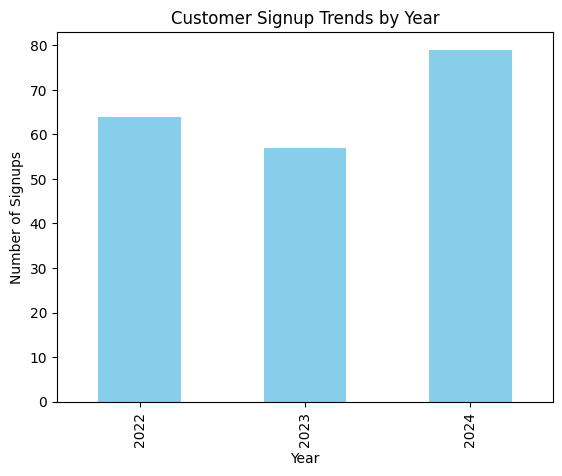

In [5]:
# Signup date trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trends.plot(kind='bar', title='Customer Signup Trends by Year', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

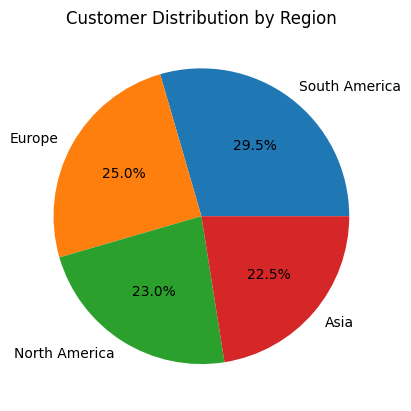

In [6]:
# Regional distribution
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='pie', autopct='%1.1f%%', title='Customer Distribution by Region')
plt.ylabel('')
plt.show()

### Products Dataset

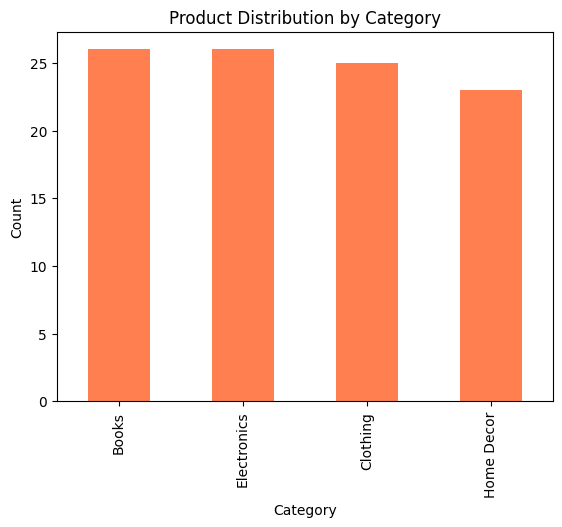

In [7]:
# Category distribution
category_counts = products['Category'].value_counts()
category_counts.plot(kind='bar', title='Product Distribution by Category', color='coral')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


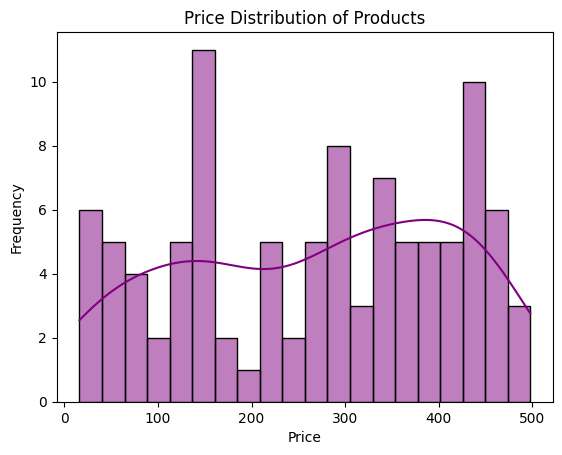

In [8]:
# Price range
sns.histplot(products['Price'], bins=20, kde=True, color='purple')
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Transactions Dataset

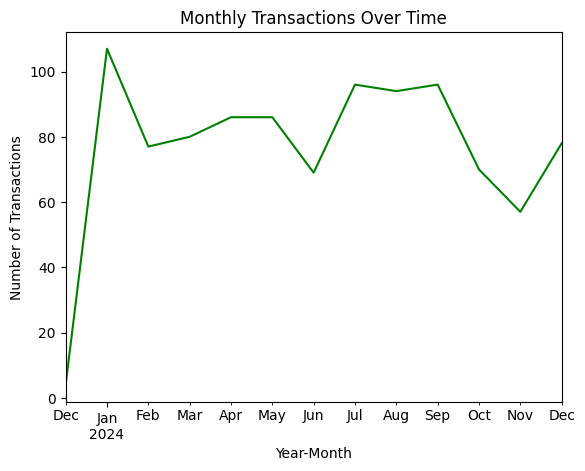

In [9]:
# Transaction frequency over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('YearMonth').size()
monthly_transactions.plot(kind='line', title='Monthly Transactions Over Time', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()


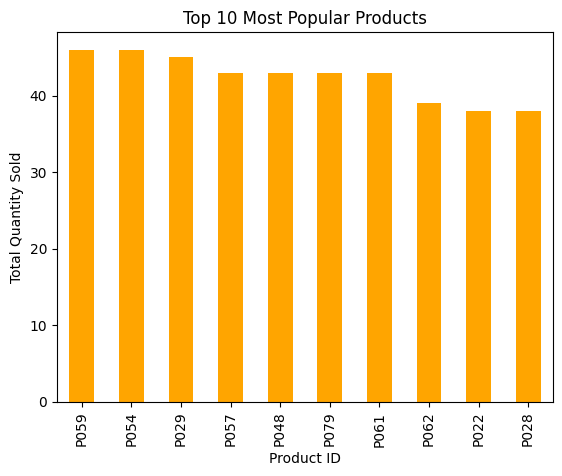

In [10]:
# Most popular products
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products.plot(kind='bar', title='Top 10 Most Popular Products', color='orange')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()


## Cross-Dataset Analysis

In [11]:
# Merge Transactions with Customers and Products
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


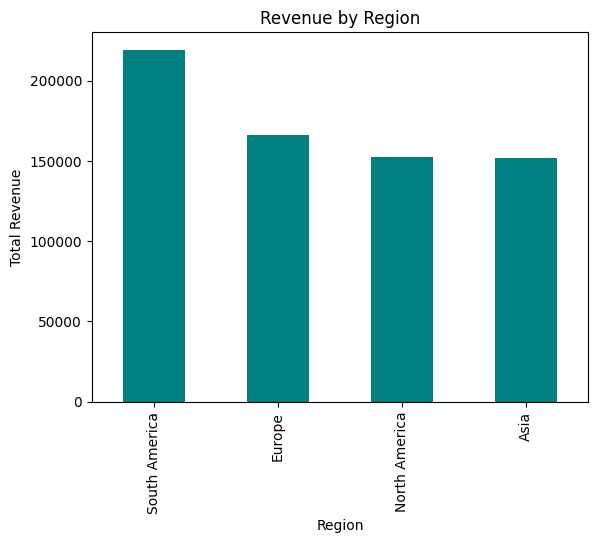

In [12]:
# Revenue by Region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', title='Revenue by Region', color='teal')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

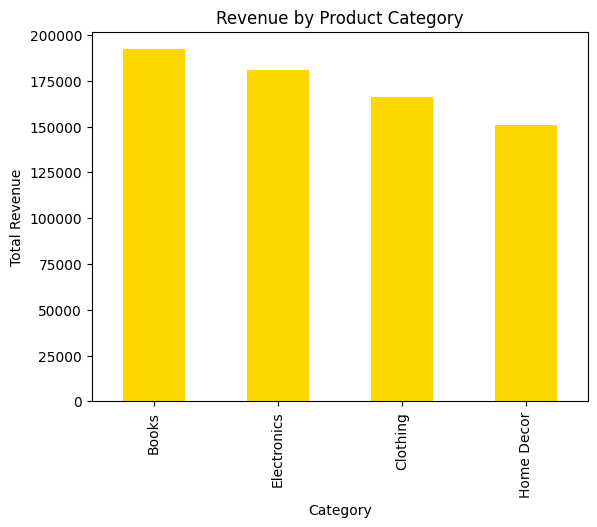

In [13]:
# Most popular categories by revenue
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Revenue by Product Category', color='gold')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

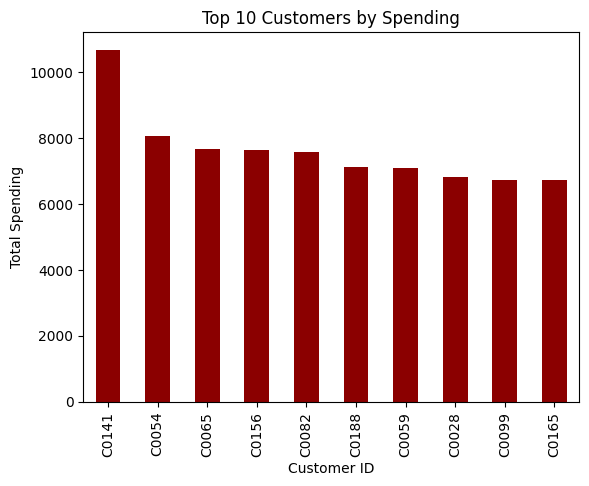

In [14]:
# Top customers by spending
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Spending', color='darkred')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()